In [1]:
import json
from lxml import etree
import re
import base64
from IPython import display


In [2]:
data_dir = "/local/scratch/lin.3976/SeeAct/online_results/SET2/Amazon_5/step_1" # "/local/scratch/lin.3976/SeeAct/process_playwright/test/Amazon_1/step_1"
# with open(data_dir + "/task_meta.json", "r") as f:
#     task_meta = json.load(f)
with open(data_dir + "/content_step1.json", "r") as f:
    dom_content = json.load(f)
with open(data_dir + "/screenshot_step1.json", "r") as f:
    screenshots = json.load(f)

All information under `processed` are extracted from the trace file `trace.zip` with help from the [playwright trace viewer](https://playwright.dev/python/docs/trace-viewer). See `src/data_utils/process_trace.py` for more detail.

`dom_content` is extracted via [Chrome DevTools](https://chromedevtools.github.io/devtools-protocol/tot/DOMSnapshot/#method-captureSnapshot), the `raw_html` and `cleaned_html` are converted from the captured dom content.

In [3]:
print(dom_content[0].keys())
dom_content[0]

dict_keys(['action_uid', 'before', 'after', 'action'])


{'action_uid': 'input',
 'before': {'dom': {'documents': [{'documentURL': 0,
     'title': 2,
     'baseURL': 1,
     'contentLanguage': -1,
     'encodingName': 3,
     'publicId': -1,
     'systemId': -1,
     'frameId': 4,
     'nodes': {'parentIndex': [-1,
       0,
       0,
       2,
       3,
       4,
       3,
       6,
       3,
       3,
       9,
       3,
       11,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       25,
       3,
       3,
       3,
       3,
       30,
       3,
       3,
       3,
       3,
       35,
       3,
       3,
       38,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       3,
       71,
       3,
   

In [4]:
from dom_utils import build_dom_tree
sample = dom_content[0]["before"]["dom"]
parsed_dom_tree = build_dom_tree(sample["documents"][0], sample["documents"], sample["strings"])
print(parsed_dom_tree)
print(etree.tostring(parsed_dom_tree, pretty_print=True).decode("utf-8"))

<Element html at 0x7f5d801e2dc0>
<html backend_node_id="113" bounding_box_rect="0,0,1280,5393.46875" __playwright_target__="call@9213" lang="en-us" class="a-ws a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d a-touch-scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data_19ax5a9jf="dingo" data_aui_build_date="3.24.5-2024-06-27" data_useragent="Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36" data_platform="Linux x86_64"><head backend_node_id="114" bounding_box_rect="-1,-1,-1,-1"><style backend_node_id="115" bounding_box_rect="-1,-1,-1,-1"><text backend_node_id="116" bounding_box_rect="-1,-1,-1,-1">*,*::before,*::after { visibility: hidden }</text></style><script backend_node_id="117" bounding_box_rect="-1,-1,-1,-1"><text backe

The screenshots are encoded as base64 strings. Ground truth action of each step is stored as `action.boudning_box`.

In [5]:
screenshots

[{'action_uid': 'input',
  'before': {'screenshot': '/9j/4AAQSkZJRgABAQAAAQABAAD/4gHYSUNDX1BST0ZJTEUAAQEAAAHIAAAAAAQwAABtbnRyUkdCIFhZWiAH4AABAAEAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlkZXNjAAAA8AAAACRyWFlaAAABFAAAABRnWFlaAAABKAAAABRiWFlaAAABPAAAABR3dHB0AAABUAAAABRyVFJDAAABZAAAAChnVFJDAAABZAAAAChiVFJDAAABZAAAAChjcHJ0AAABjAAAADxtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAAgAAAAcAHMAUgBHAEJYWVogAAAAAAAAb6IAADj1AAADkFhZWiAAAAAAAABimQAAt4UAABjaWFlaIAAAAAAAACSgAAAPhAAAts9YWVogAAAAAAAA9tYAAQAAAADTLXBhcmEAAAAAAAQAAAACZmYAAPKnAAANWQAAE9AAAApbAAAAAAAAAABtbHVjAAAAAAAAAAEAAAAMZW5VUwAAACAAAAAcAEcAbwBvAGcAbABlACAASQBuAGMALgAgADIAMAAxADb/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCBURBQADASIAAhEBAxEB/8QAHgABAAEEAwEBAAAAAAAAAAAAAAYEBQcIAgMJAQr/xAB8EAABAwMCAwMECQsLDQoKARUBAgMEAAU

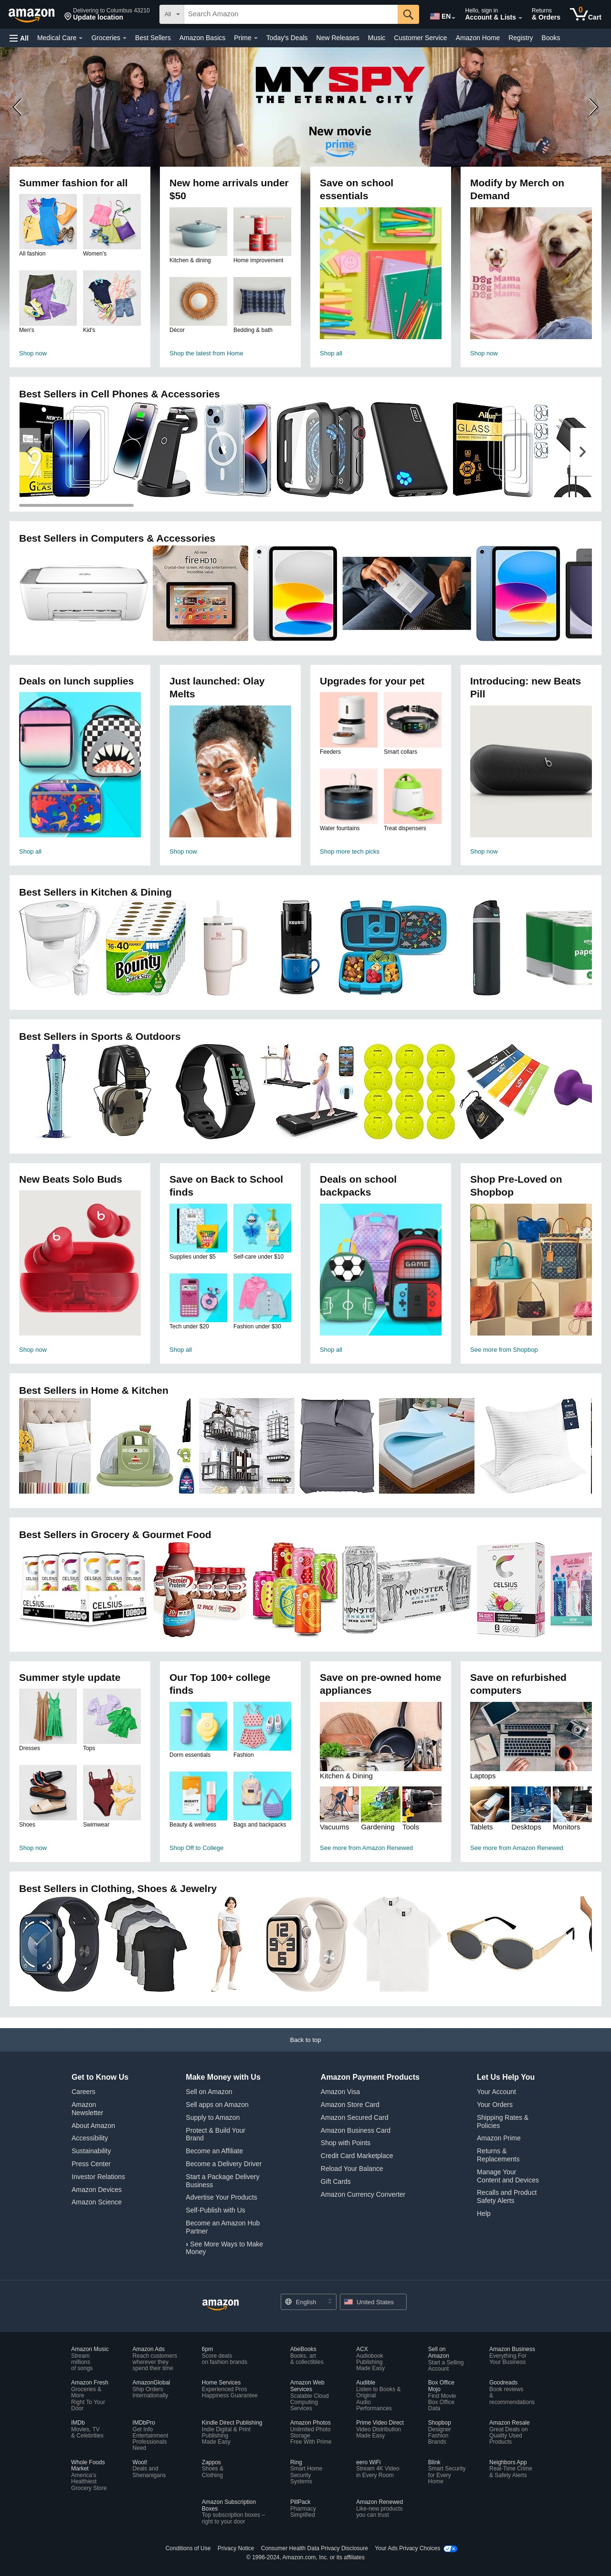

In [6]:
display.Image(base64.b64decode(screenshots[0]["before"]["screenshot"]))

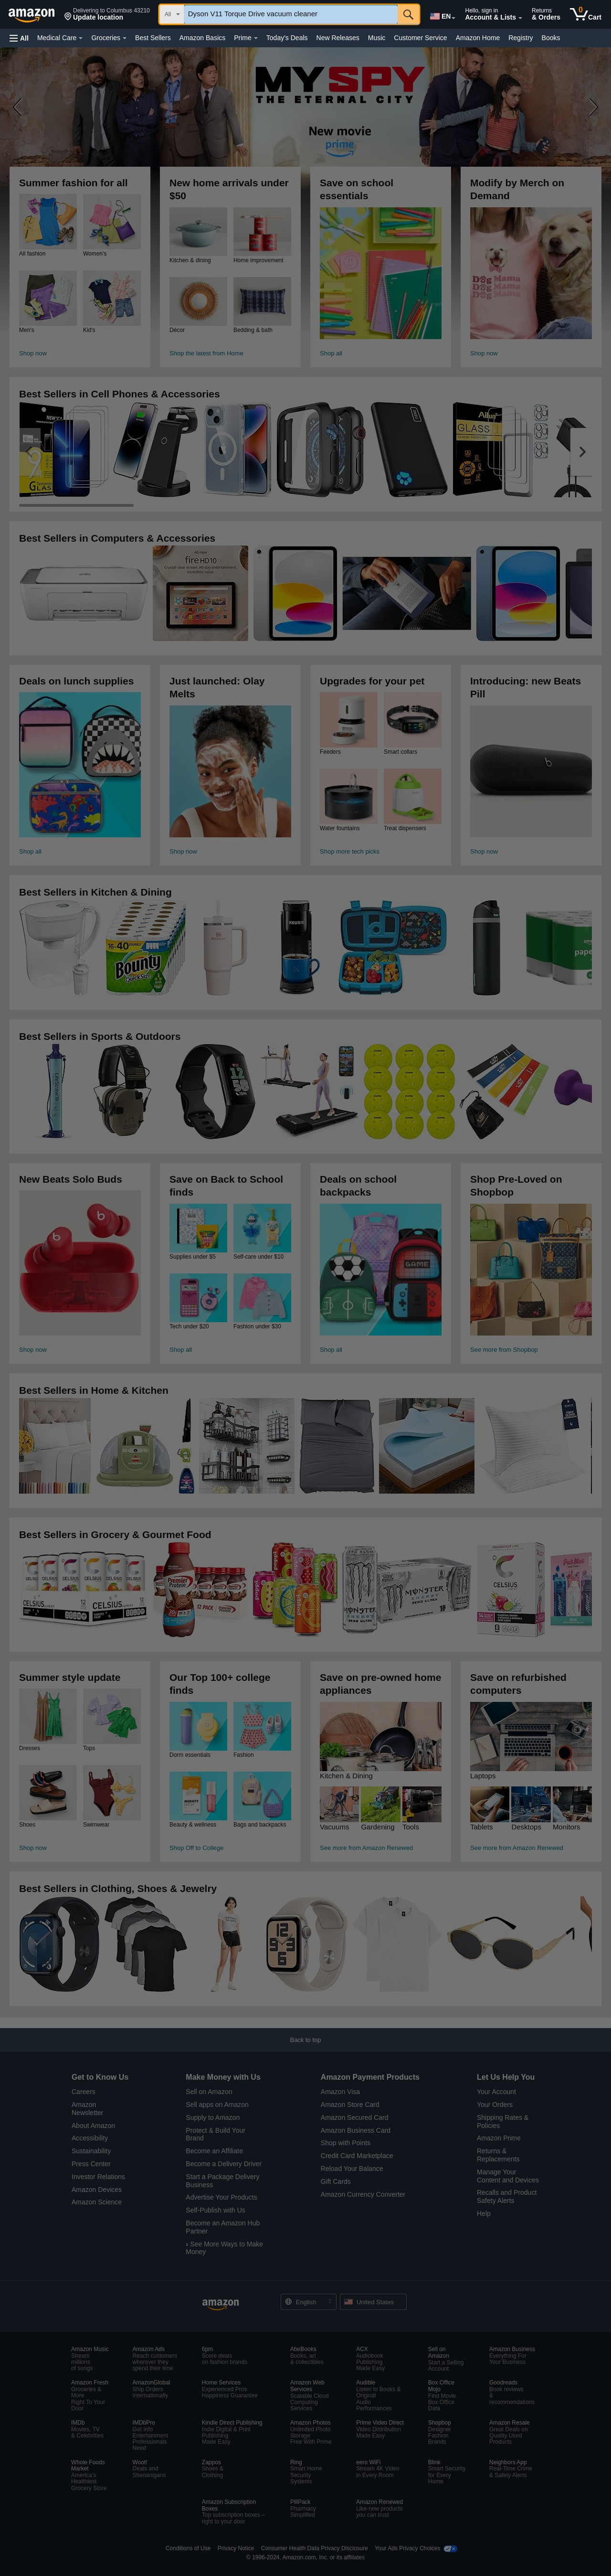

In [7]:
display.Image(base64.b64decode(screenshots[0]["after"]["screenshot"]))